In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
dir ='D:\JOY\J AMITY\Machine Learning\PInfotech\Task-4\leapGestRecog'

In [6]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt 
import os 
import cv2 
import numpy as np
import pandas as pd

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

In [8]:
from tqdm import tqdm

image_data = []
for dr in tqdm(os.listdir(dir), desc='Folders'):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(dir, dr, category)
        for img in tqdm(os.listdir(path), desc='Images', leave=False):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]


Images:  96%|███████████████████████████████████████████████████████████████████▊   | 191/200 [00:00<00:00, 405.18it/s]
                                                                                                                       
Images:  78%|███████████████████████████████████████████████████████▍               | 156/200 [00:00<00:00, 470.68it/s]
                                                                                                                       
Images:  77%|██████████████████████████████████████████████████████▋                | 154/200 [00:00<00:00, 494.89it/s]
                                                                                                                       
Images:  76%|██████████████████████████████████████████████████████▎                | 153/200 [00:00<00:00, 491.91it/s]
                                                                                                                       
Images:  76%|███████████████████████████

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\JOY\\J AMITY\\Machine Learning\\PInfotech\\Task-4\\leapGestRecog\\leapGestRecog\\01_palm'

In [9]:
import random
random.shuffle(image_data)

In [10]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
    

In [11]:
label[:10]

[8, 2, 3, 3, 5, 9, 0, 9, 3, 8]

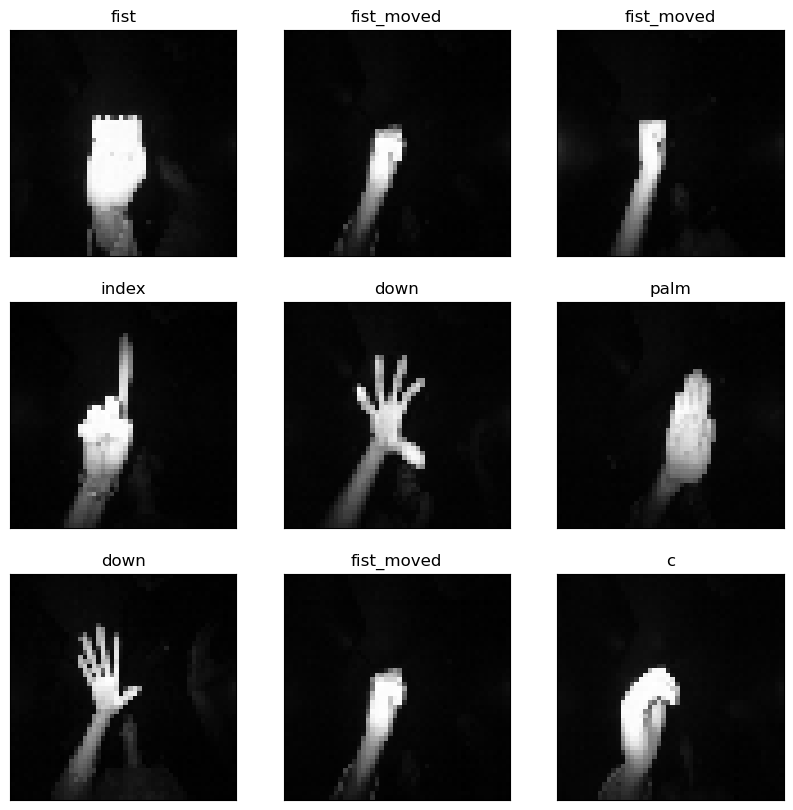

In [12]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [13]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [14]:
import keras
from keras.utils import to_categorical
label = to_categorical(label)

In [15]:
#reshape
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

## CNN

In [16]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label,test_size=0.2, random_state=42, shuffle=True)

In [17]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs =4, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/4
500/500 [==============================] - 41s 80ms/step - loss: 0.2333 - accuracy: 0.9284 - val_loss: 0.0126 - val_accuracy: 0.9955
Epoch 2/4
500/500 [==============================] - 40s 80ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9977
Epoch 3/4
500/500 [==============================] - 39s 78ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0102 - val_accuracy: 0.9970
Epoch 4/4
500/500 [==============================] - 41s 83ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0067 - val_accuracy: 0.9987


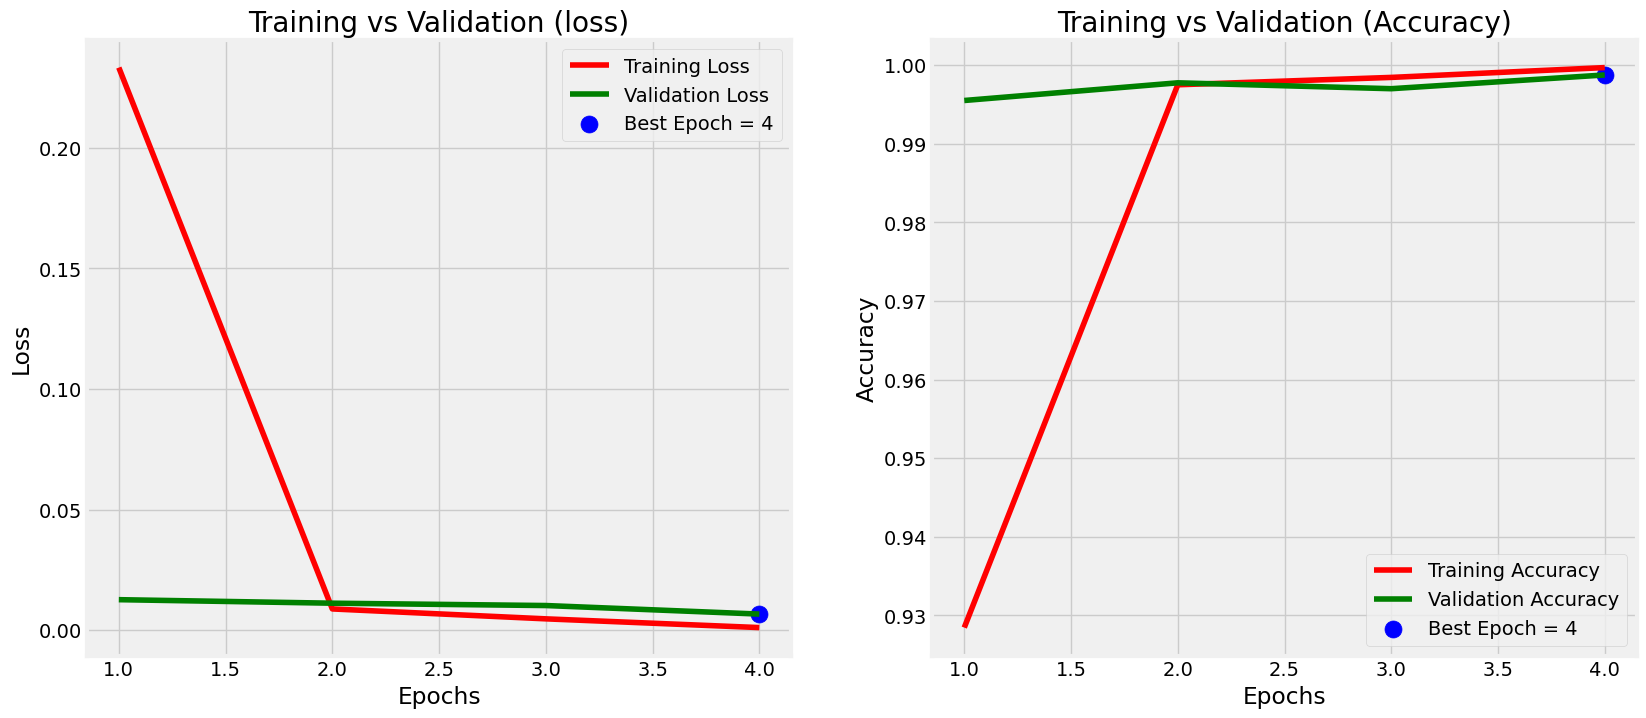

In [19]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show();

In [20]:
#calculate loss and accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

125/125 [==============================] - 2s 16ms/step - loss: 0.0067 - accuracy: 0.9987
Test accuracy: 99.87%
